<a href="https://colab.research.google.com/github/febbyanindya/MSIB-OrbitFutureAcademy/blob/Python/07_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library yg dibutuhkan

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn import metrics
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
#tambahkan library sesuai kebutuhan

In [127]:
!wget https://raw.githubusercontent.com/febbyanindya/MSIB-OrbitFutureAcademy/Python/Data/Activity_07_4.csv

--2021-11-12 14:04:07--  https://raw.githubusercontent.com/febbyanindya/MSIB-OrbitFutureAcademy/Python/Data/Activity_07_4.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34061 (33K) [text/plain]
Saving to: ‘Activity_07_4.csv.6’

Activity_07_4.csv.6 100%[===================>]  33.26K  --.-KB/s    in 0.002s  

2021-11-12 14:04:07 (14.7 MB/s) - ‘Activity_07_4.csv.6’ saved [34061/34061]



In [128]:
data = pd.read_csv('Activity_07_4.csv')
data

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 1. Mengganti nama kolom yang menggunakan spasi

In [129]:
data2 = pd.DataFrame(data)
# df_data = df.columns.str.replace(' ', '_')
data2.rename(columns = {'intensitas air':'intensitas_air', 'tinggi air':'tinggi_air'}, inplace=True)
data2

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,Hidupkan Lampu
612,2.1,Ada,Rendah sekali,25.0,388.0,18,Hidupkan Lampu dan Pompa nutrisi TDS
613,3.2,Ada,Rendah sekali,25.3,793.0,19,Hidupkan Lampu
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,Hidupkan Lampu


## 2. Mengganti data kategorikal menjadi bentuk numerical (Clue : Labelencoder tidak bekerja ketika ada missing value, gunakan metode lain)

In [130]:
data2['aksi'].unique()

array(['Hidupkan Lampu dan Pompa nutrisi TDS', 'Tidak melakukan apa-apa',
       'Hidupkan Lampu', 'Hidupkan Pompa nutrisi TDS'], dtype=object)

In [131]:
def aksi(category):
    if category=="Tidak melakukan apa-apa":
        return 0
    elif category=="Hidupkan Lampu":
        return 1
    elif category=="Hidupkan Pompa nutrisi TDS":
        return 2
    elif category=="Hidupkan Lampu dan Pompa nutrisi TDS":
        return 3
    else:
        return category
data2["aksi"]=data2["aksi"].apply(aksi)
data2

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,3
1,5.7,Ada,Tinggi,26.9,79.0,557,3
2,6.0,Ada,Tinggi,27.0,11.0,491,3
3,6.5,Ada,Tinggi,27.1,345.0,12000,0
4,6.2,NaN,Tinggi,27.1,602.0,444,0
...,...,...,...,...,...,...,...
611,4.6,Ada,Rendah sekali,25.3,904.0,47,1
612,2.1,Ada,Rendah sekali,25.0,388.0,18,3
613,3.2,Ada,Rendah sekali,25.3,793.0,19,1
614,1.4,Ada,Rendah sekali,25.4,1052.0,3,1


In [132]:
data2['intensitas_air'].unique()

array(['Tinggi', 'Cukup', 'Rendah', 'Rendah sekali'], dtype=object)

In [133]:
def intensitas(category):
    if category=="Rendah sekali":
        return 0
    elif category=="Rendah":
        return 1
    elif category=="Cukup":
        return 2
    elif category=="Tinggi":
        return 3
    else:
        return category
data2["intensitas_air"]=data2["intensitas_air"].apply(intensitas)
data2

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,3,27.0,188.0,622,3
1,5.7,Ada,3,26.9,79.0,557,3
2,6.0,Ada,3,27.0,11.0,491,3
3,6.5,Ada,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0
...,...,...,...,...,...,...,...
611,4.6,Ada,0,25.3,904.0,47,1
612,2.1,Ada,0,25.0,388.0,18,3
613,3.2,Ada,0,25.3,793.0,19,1
614,1.4,Ada,0,25.4,1052.0,3,1


In [134]:
data2['cahaya'].unique()

array(['Ada', nan, 'Tidak ada'], dtype=object)

In [135]:
def cahaya(category):
    if category=="Tidak ada":
        return 0
    elif category=="Ada":
        return 1
    else:
        return category
data2["cahaya"]=data2["cahaya"].apply(cahaya)
data2

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1.0,3,27.0,188.0,622,3
1,5.7,1.0,3,26.9,79.0,557,3
2,6.0,1.0,3,27.0,11.0,491,3
3,6.5,1.0,3,27.1,345.0,12000,0
4,6.2,NaN,3,27.1,602.0,444,0
...,...,...,...,...,...,...,...
611,4.6,1.0,0,25.3,904.0,47,1
612,2.1,1.0,0,25.0,388.0,18,3
613,3.2,1.0,0,25.3,793.0,19,1
614,1.4,1.0,0,25.4,1052.0,3,1


## 3. Handle Missing Value

In [136]:
#Isi Code
missing_data = pd.DataFrame({'total_missing': data2.isnull().sum(), 'perc_missing': (data2.isnull().sum()/616)*100})
missing_data

,total_missing,perc_missing
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


## 4. Detect outliers dan handling (bisa dihapus atau diganti nilainya dengan mean/modus/median)

In [137]:
#Isi Code
#Handling Missing Value pada kolom non-kategorik
columns_missing = ['PH', 'suhu', 'PPM']
for col in columns_missing:
  data2[col].replace(np.nan, data2[col].mean(), inplace=True)
  
data2.isnull().sum()

PH                 0
cahaya            26
intensitas_air     0
suhu               0
PPM                0
tinggi_air         0
aksi               0
dtype: int64

In [138]:
data2['cahaya'].mode()

0    1.0
dtype: float64

In [139]:
#Handling Missing Value pada kolom kategorik menggunakan modus
columns_missing = ['cahaya']
for col in columns_missing:
  data2[col].replace(np.nan, 1.0, inplace=True)
  
data2.isnull().sum()

PH                0
cahaya            0
intensitas_air    0
suhu              0
PPM               0
tinggi_air        0
aksi              0
dtype: int64

## 5. Pisahkan data feature dengan label

In [140]:
#Isi Code
x = data2[['PH',	'cahaya',	'intensitas_air',	'suhu',	'PPM',	'tinggi_air']]
y = data2['aksi']

## 6. Check Imbalanced Dataset, jika imbalanced, gunakan smote

In [141]:
#pip install imbalanced-learn
!pip install imbalanced-learn

In [120]:
#Isi Code
data2.aksi.value_counts()

0    473
1     92
3     39
2     12
Name: aksi, dtype: int64

In [99]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 473, 1: 92, 3: 39, 2: 12})


In [145]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
x_smote, y_smote = oversample.fit_resample(x, y)
counter = Counter(y_smote)
print(counter)

Counter({3: 473, 0: 473, 1: 473, 2: 473})


## 7. Visualisasikan Tiap feature dengan label

In [146]:
#Isi Code
data['cahaya'].value_counts()

1.0    328
0.0    288
Name: cahaya, dtype: int64

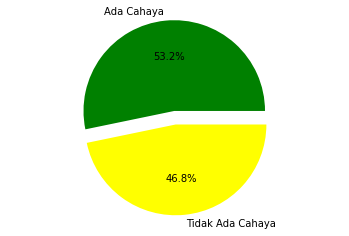

In [151]:
import matplotlib.pyplot as plt
from matplotlib import style
ada_cahaya = (data2['cahaya'] == 1).sum()
tidak_ada_cahaya = (data2['cahaya'] == 0).sum()
p = [ada_cahaya, tidak_ada_cahaya]
plt.pie(p,    #array kategori pie chart
        autopct='%1.1f%%', labels = ['Ada Cahaya', 'Tidak Ada Cahaya'], #Label tiap kategori
        colors = ['green', 'yellow'],   #Memberikan warna sesuai urutan array
        explode = (0.15, 0),    #Memberikan efek seolah bagian 1 menjauh      
        startangle = 0)  #Sudut mulai
plt.axis('equal')
plt.show()

In [152]:
# Aksi dengan ada cahaya
cahaya_0 = data2[data2['cahaya'] == 1][data2['aksi'] == 0].shape[0]
cahaya_1 = data2[data2['cahaya'] == 1][data2['aksi'] == 1].shape[0]
cahaya_2 = data2[data2['cahaya'] == 1][data2['aksi'] == 2].shape[0]
cahaya_3 = data2[data2['cahaya'] == 1][data2['aksi'] == 3].shape[0]
# Aksi tanpa ada cahaya
no_cahaya_0 = data2[data2['cahaya'] == 0][data2['aksi'] == 0].shape[0]
no_cahaya_1 = data2[data2['cahaya'] == 0][data2['aksi'] == 1].shape[0]
no_cahaya_2 = data2[data2['cahaya'] == 0][data2['aksi'] == 2].shape[0]
no_cahaya_3 = data2[data2['cahaya'] == 0][data2['aksi'] == 3].shape[0]

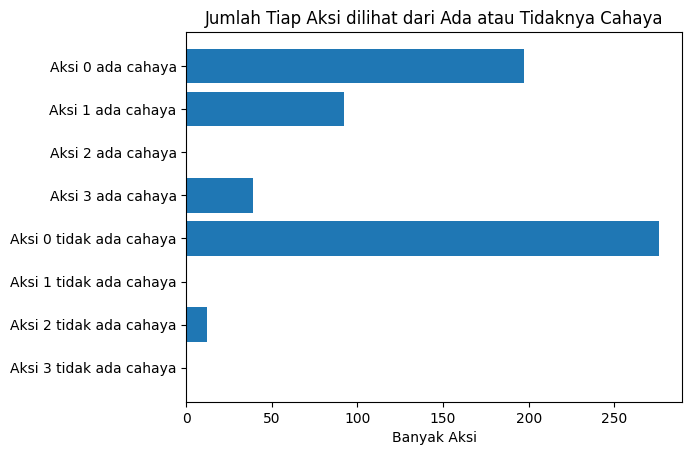

In [154]:
chart=[cahaya_0, cahaya_1, cahaya_2, cahaya_3, no_cahaya_0, no_cahaya_1, no_cahaya_2, no_cahaya_3]
colors=['lightskyblue','yellowgreen','Yellow','Orange', 'Pink', 'Red', 'Blue', 'Green']
labels=["Aksi 0 ada cahaya","Aksi 1 ada cahaya","Aksi 2 ada cahaya","Aksi 3 ada cahaya", 
        'Aksi 0 tidak ada cahaya', 'Aksi 1 tidak ada cahaya', 'Aksi 2 tidak ada cahaya', 'Aksi 3 tidak ada cahaya']
y_pos = np.arange(len(labels))
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y_pos, chart, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Banyak Aksi')
ax.set_title('Jumlah Tiap Aksi dilihat dari Ada atau Tidaknya Cahaya');

## 8. Lakukan Normalization menggunakan MinMaxScaler atau Standardization menggunakan StandarScaler

In [156]:
#Isi Kode
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)
print(scaled)

[[-0.05170588  0.93704257  1.34164079 -0.16198388 -1.3420191   0.53673942]
 [-0.31828832  0.93704257  1.34164079 -0.16883597 -1.51516516  0.43222979]
 [-0.21831991  0.93704257  1.34164079 -0.16198388 -1.62318289  0.32611233]
 ...
 [-1.15135843  0.93704257 -1.34164079 -0.27846942 -0.38097905 -0.43278836]
 [-1.75116891  0.93704257 -1.34164079 -0.27161733  0.03044141 -0.45851381]
 [-0.55154795  0.93704257 -1.34164079 -0.27846942 -0.08869579 -0.43278836]]


In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
# transform data
scaled_smote = scaler.fit_transform(x_smote)
print(scaled_smote)

[[0.46428571 1.         1.         0.96007046 0.08705773 0.05183333]
 [0.40714286 1.         1.         0.95977686 0.03631285 0.04641667]
 [0.42857143 1.         1.         0.96007046 0.00465549 0.04091667]
 ...
 [0.67221168 1.         0.09032389 0.95900214 0.09256322 0.05077204]
 [0.42050259 1.         0.24118185 0.95892713 0.09092501 0.01985439]
 [0.49054339 1.         0.02159503 0.96005144 0.18376597 0.02063828]]


In [160]:
scaler =  MinMaxScaler()
# transform data
scaled = scaler.fit_transform(x)
print(scaled)

[[4.64285714e-01 1.00000000e+00 1.00000000e+00 9.60070464e-01
  8.70577281e-02 5.18333333e-02]
 [4.07142857e-01 1.00000000e+00 1.00000000e+00 9.59776864e-01
  3.63128492e-02 4.64166667e-02]
 [4.28571429e-01 1.00000000e+00 1.00000000e+00 9.60070464e-01
  4.65549348e-03 4.09166667e-02]
 ...
 [2.28571429e-01 1.00000000e+00 0.00000000e+00 9.55079272e-01
  3.68715084e-01 1.58333333e-03]
 [1.00000000e-01 1.00000000e+00 0.00000000e+00 9.55372871e-01
  4.89292365e-01 2.50000000e-04]
 [3.57142857e-01 1.00000000e+00 0.00000000e+00 9.55079272e-01
  4.54376164e-01 1.58333333e-03]]


## 9. Buat model ANN

In [165]:
#Isi Code
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [166]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [168]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_smote,y_smote, test_size = 0.2, random_state = 42)
hasil = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_split=0.3)
loss, acc = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2232 - accuracy: 0.9216 - val_loss: 0.2295 - val_accuracy: 0.9163
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9197 - val_loss: 0.2263 - val_accuracy: 0.9163
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9263 - val_loss: 0.2258 - val_accuracy: 0.9207
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9245 - val_loss: 0.2246 - val_accuracy: 0.9207
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.9216 - val_loss: 0.2246 - val_accuracy: 0.9163
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2186 - accuracy: 0.9263 - val_loss: 0.2332 - val_accuracy: 0.9097
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9226 - val_loss: 0.2232 - val_accuracy: 0.9229
Epoch 8/100
3

In [169]:
print('Test Accuracy_model: %.3f' % acc)

Test Accuracy_model: 0.913


## 10. Build Model KNN

In [178]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

In [179]:
from sklearn import metrics

yhat = knn.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9610046265697291
Test set Accuracy:  0.9340369393139841
